<a href="https://colab.research.google.com/github/tejash2005/E-commerce_project/blob/main/DATACLEANING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/My Drive/Online Retail.csv'
df = pd.read_csv(file_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [125]:
df.shape

(541909, 8)

#Data Cleaning

In [126]:
#Check for Missing Values
print('\n Missing data : ')
print(df.isnull().sum())


 Missing data : 
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [127]:
#Removing Records having Blank values in CustomerID
df['CustomerID'].replace('', np.nan, inplace=True)
df.dropna(subset=['CustomerID'], inplace=True)
print('\n Dimension of Data is : ')
print(df.shape)


 Dimension of Data is : 
(406829, 8)


/tmp/ipython-input-667274253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].replace('', np.nan, inplace=True)


In [128]:
#Drop Duplicate Records
df.drop_duplicates()
print(df.shape)

(406829, 8)


In [129]:
#Save Cleaned Dataset
df.to_csv('cleane_data.csv', index=False)
print("Cleaned retail dataset saved as 'cleane_data.csv'")

Cleaned retail dataset saved as 'cleane_data.csv'


In [130]:
#Displaying the Cleaned top five records of Dataframe
df['TotalPrice']=df['Quantity']*df['UnitPrice']
print(df.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom       15.30  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom       20.34  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom       22.00  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom       20.34  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom       20.34  


In [131]:
df1 = df.groupby(['InvoiceNo'])['InvoiceNo'].count().reset_index(name='InvoiceCounts')
df2 = df.groupby(['InvoiceNo'])['TotalPrice'].sum().reset_index(name='InvoicePrice')
df1=df1.join(df2['InvoicePrice'])
print(df.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom       15.30  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom       20.34  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom       22.00  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom       20.34  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom       20.34  


In [132]:
#View the statistical summary of numerical variables
print('Summary Statistics is :')
df1[['InvoiceCounts','InvoicePrice']].describe()
df.head()
df.describe()

Summary Statistics is :


,Quantity,UnitPrice,CustomerID,TotalPrice
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [133]:
df.shape

(406829, 9)

#RFM Analysis

In [134]:
import pandas as pd

#Calculating Recency
data_recency = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
data_recency.columns = ['CustomerID', 'LastInvoiceDate']

# Convert 'LastInvoiceDate' and recent_date to datetime objects
data_recency['LastInvoiceDate'] = pd.to_datetime(data_recency['LastInvoiceDate'])
recent_date = data_recency['LastInvoiceDate'].max()

# Now calculate Recency
data_recency['Recency'] = data_recency['LastInvoiceDate'].apply(lambda x: (recent_date - x).days)
print(data_recency.head(5))

   CustomerID     LastInvoiceDate  Recency
0     12346.0 2011-01-18 10:17:00      325
1     12347.0 2011-10-31 12:25:00       38
2     12348.0 2011-09-25 13:13:00       74
3     12349.0 2011-11-21 09:51:00       18
4     12350.0 2011-02-02 16:01:00      309


/tmp/ipython-input-2079892401.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_recency['LastInvoiceDate'] = pd.to_datetime(data_recency['LastInvoiceDate'])


In [135]:
#Calculating Frequency
frequency_data = df.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_data.columns = ['CustomerID', 'Frequency']
frequency_data.head(5)

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [136]:
#Calculating Monetary Value
df['Total'] = df['UnitPrice']*df['Quantity']
monetary_data = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_data.columns = ['CustomerID', 'Monetary']
monetary_data.head(5)

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [137]:
#Merging RFM
rf_data = data_recency.merge(frequency_data, on='CustomerID')
rfm_data = rf_data.merge(monetary_data, on='CustomerID').drop(
    columns='LastInvoiceDate')
rfm_data.head(5)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,38,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [138]:
#Ranking Customer’s based upon their RFM score
rfm_data['R_rank'] = rfm_data['Recency'].rank(ascending=False)
rfm_data['F_rank'] = rfm_data['Frequency'].rank(ascending=True)
rfm_data['M_rank'] = rfm_data['Monetary'].rank(ascending=True)

In [139]:
# normalizing the rank of the customers
rfm_data['R_rank_norm'] = (rfm_data['R_rank']/rfm_data['R_rank'].max())*100
rfm_data['F_rank_norm'] = (rfm_data['F_rank']/rfm_data['F_rank'].max())*100
rfm_data['M_rank_norm'] = (rfm_data['F_rank']/rfm_data['M_rank'].max())*100

In [140]:
rfm_data.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_data.head(5)

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,325,2,0.00,5.699897,2.493138,2.493138
1,12347.0,38,182,4310.00,80.897333,88.129003,88.129003
2,12348.0,74,31,1797.24,61.245279,42.074565,42.074565
3,12349.0,18,73,1757.55,87.902026,66.720037,66.720037
4,12350.0,309,17,334.40,11.067872,24.794145,24.794145


In [141]:
#Calculating RFM score
rfm_data['RFM_Score'] = 0.15*rfm_data['R_rank_norm']+0.28 * \
    rfm_data['F_rank_norm']+0.57*rfm_data['M_rank_norm']
rfm_data['RFM_Score'] *= 0.05
rfm_data = rfm_data.round(2)
rfm_data[['CustomerID', 'RFM_Score']].head(5)

,CustomerID,RFM_Score
0,12346.0,0.15
1,12347.0,4.35
2,12348.0,2.25
3,12349.0,3.49
4,12350.0,1.14


In [142]:
#Rating Customer based upon the RFM score
rfm_data["Customer_segment"] = np.where(rfm_data['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_data['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_data['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_data['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_data['CustomerID'] = rfm_data['CustomerID'].astype(int)
rfm_data[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,12346,0.15,Lost Customers
1,12347,4.35,High value Customer
2,12348,2.25,Low Value Customers
3,12349,3.49,Medium Value Customer
4,12350,1.14,Lost Customers
5,12352,3.61,Medium Value Customer
6,12353,0.45,Lost Customers
7,12354,2.76,Low Value Customers
8,12355,1.04,Lost Customers
9,12356,2.62,Low Value Customers


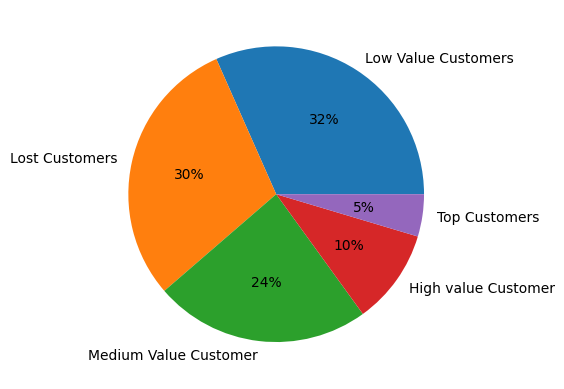

In [143]:
#Visualizing the customer segments
plt.pie(rfm_data.Customer_segment.value_counts(),
        labels=rfm_data.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [144]:
# Save the DataFrame to a CSV file in your Google Drive
rfm_data.to_csv('/content/drive/My Drive/rfm_data.csv', index=False)


In [145]:
# Save the DataFrame to a CSV file in your Google Drive
df1.to_csv('/content/drive/My Drive/df1.csv', index=False)

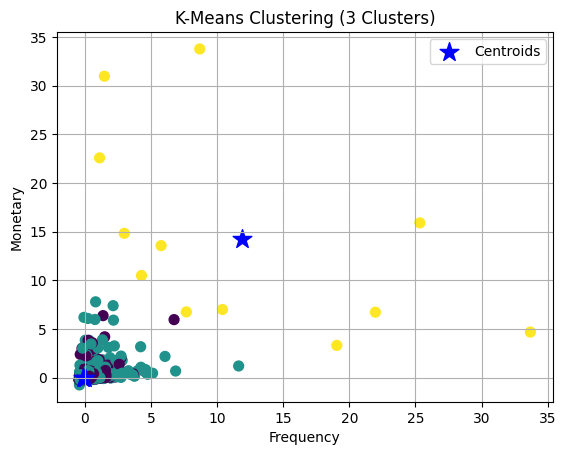

In [146]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select RFM features
X = rfm_data[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot: Frequency vs Monetary
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 1], centers[:, 2], c='blue', marker='*', s=200, label='Centroids')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('K-Means Clustering (3 Clusters)')
plt.legend()
plt.grid(True)
plt.show()
